<font size=6><b>Lec02 : 금융을 위한 Pandas 활용 </b></font>

### 주식 용어
<pre>
* <b>시가총액</b> : 시가총액은 <b>기업의 가치</b>를 결정하는 지표
          시가총액 = 주식 수 × 주식 1주당 가격

* <B>KOSPI</B> : 한국증권거래소에 상장되어 거래되는 모든 주식의 시가총액을 합쳐서 주식시장 전체 장세의 흐름을 나타내는 지수(상장 조건에 해당하는 기업)
          KOSPI 지수 = (현재 시가총액 합 / 1980. 1. 4 기준 시가총액 합) × 100
 
* <B> KOSDAQ</B> : <b>중소기업</b>이나 신생 벤처기업을 위한 <b>1996년</b> 첨단 기술주 중심인 <b>미국의 나스닥(NASDAQ) 시장</b>을 본떠 만든 대한민국의 주식시장

* <B> KOSPI 200</B> : 어업, 광업, 제조업, 전기가스업, 건설업, 서비스업, 통신업 등 8개의 산업군에서 각 산업을 대표할 수 있는 200개의 종목을 뽑아서 만든 지수

* <B> KODEX 200</B> : <b>삼성자산운용에서 운용하는 ETF</b>로, KOSPI 200을 추종(복제)하는 ETF(KOSPI의 파생 개념)

* <b> KONEX </b> : 상장을 앞둔 비상장주(시장 외거래, 예금자 보호를 받지 못함)

* <B> ETF</B> : 특정 주가지수 또는 금, 채권, 원유와 같은 특정 자산가격를 그대로 추종하는 성격을 지닌 금융상품
 </pre>

- 순매수 : 매수 - 매도
    - 순매수 < 0 : 매도세가 강하다
    - 순매수 > 0 : 매수세가 강하다
    
- primium risk 위험리스크 : 위험을 감수한 대가로 지불되는 보상

- stock.get_market_fundamental("2022")   
    - BPS : 주당 순자산가치. 기업의 총자산에서 부채를 빼면 기업의 순자산이 남는데, 이 순자산을 발행주식수로 나눈 수치를 말한다.
    - PER : 주가수익비율,  주가를 주당순이익으로 나눈 주가의 수익성 지표
    - PBR : 주가순자산비율, 주가를 주당순자산으로 나눈것 
    - EPS : 주당순이익,  순이익(당기순이익)을 유통되는 보통주 주식 수로 나눈 값

- 서프라이즈 & 쇼크
    - 예측치보다 더 높을때 : 어닝서프라이즈
    - 예측치보다 더 낮을때 : 쇼크

In [1]:
from pykrx import stock
from pykrx import bond
import FinanceDataReader as fdr

from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# Data Load by pykrx

In [26]:
tickers = stock.get_market_ticker_list("20220225", market="KOSDAQ") #KOSPI, KOSDAQ, KONEX
print(tickers[:5])

['060310', '054620', '265520', '211270', '032790']


In [3]:
종목명 = stock.get_market_ticker_name('035760')
print(종목명)

CJ ENM


In [4]:
df = stock.get_market_ohlcv("2021-01-01", "2021-12-31", "005930")
df.head(3)

,시가,고가,저가,종가,거래량,거래대금,등락률
날짜,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,3185356823460,2.47
2021-01-05,81600,83900,81600,83900,35335669,2915618322800,1.08
2021-01-06,83300,84500,82100,82200,42089013,3506903681680,-2.03


In [5]:
df.columns

Index(['시가', '고가', '저가', '종가', '거래량', '거래대금', '등락률'], dtype='object')

* 컬럼 이름 변경

In [6]:
df = df[['시가', '고가', '저가', '종가', '거래량']].copy()
df.columns = ['open','high','low','close','volumn']

In [7]:
df.isna().sum()

open      0
high      0
low       0
close     0
volumn    0
dtype: int64

# 금융을 위한 pandas

## shift(N)
* N일가격 컬럼에 가져오기
* N개의 NaN이 생김
* <font size=4 color=red><b>전일 대비 가격 증감에 주로 사용 

In [8]:
df['close_shift'] = df['close'].shift(1)
df.head()

,open,high,low,close,volumn,close_shift
날짜,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,NaN
2021-01-05,81600,83900,81600,83900,35335669,83000.0
2021-01-06,83300,84500,82100,82200,42089013,83900.0
2021-01-07,82800,84200,82700,82900,32644642,82200.0
2021-01-08,83300,90000,83000,88800,59013307,82900.0


In [9]:
df['close'].shift(-1)

날짜
2021-01-04    83900.0
2021-01-05    82200.0
2021-01-06    82900.0
2021-01-07    88800.0
2021-01-08    91000.0
               ...   
2021-12-24    80200.0
2021-12-27    80300.0
2021-12-28    78800.0
2021-12-29    78300.0
2021-12-30        NaN
Name: close, Length: 248, dtype: float64

## df["Close"] - df["Close"].shift(1)

In [10]:
last_day = df["close"].shift(1)
today    = df["close"]
df["pct_chg1"] =   ( (today - last_day) / last_day ) * 100
df.head(3)

,open,high,low,close,volumn,close_shift,pct_chg1
날짜,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,NaN,NaN
2021-01-05,81600,83900,81600,83900,35335669,83000.0,1.084337
2021-01-06,83300,84500,82100,82200,42089013,83900.0,-2.026222


## diff(N)
* 변화량 : 현재가격 - N일가격 
* <font size=4 color=red><b> N일 대비 가격 증감에 주로 사용
* <font size=4 color=blue><b> df['close'].diff(1) = </font>  <font size=4 color=red><b> df['close'] - df['colse'].shift(1)

In [11]:
df['close_diff'] = df['close'].diff(1)
df['close-close_shift'] = df['close'] - df['close_shift']
df.head()

,open,high,low,close,volumn,close_shift,pct_chg1,close_diff,close-close_shift
날짜,,,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,NaN,NaN,NaN,NaN
2021-01-05,81600,83900,81600,83900,35335669,83000.0,1.084337,900.0,900.0
2021-01-06,83300,84500,82100,82200,42089013,83900.0,-2.026222,-1700.0,-1700.0
2021-01-07,82800,84200,82700,82900,32644642,82200.0,0.851582,700.0,700.0
2021-01-08,83300,90000,83000,88800,59013307,82900.0,7.117008,5900.0,5900.0


## pct_change(N)
* 백분위 변화율 : <font size =4 > $ \frac{현재가격 - N일전 가격}{N일 전 가격} \times 100 $
* <font size=4 color=red><b>전일 대비 수익률에 주로 사용
* .pct_change(N) = .diff(N)/.shift(N) = (df- df.shift(1) )/df.shift(1)

In [18]:
df['pct_chg'] = df['close'].pct_change()
df.head()

,open,high,low,close,volumn,close_shift,pct_chg1,close_diff,close-close_shift,pct_chg,close_ma5,close_ma20,close_ma60,close_ma120
날짜,,,,,,,,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,81600,83900,81600,83900,35335669,83000.0,1.084337,900.0,900.0,0.010843,NaN,NaN,NaN,NaN
2021-01-06,83300,84500,82100,82200,42089013,83900.0,-2.026222,-1700.0,-1700.0,-0.020262,NaN,NaN,NaN,NaN
2021-01-07,82800,84200,82700,82900,32644642,82200.0,0.851582,700.0,700.0,0.008516,NaN,NaN,NaN,NaN
2021-01-08,83300,90000,83000,88800,59013307,82900.0,7.117008,5900.0,5900.0,0.071170,84160.0,NaN,NaN,NaN


## rolling(window=N)
*  N개의 일(오늘 포함) 간격으로 그룹화(window)해 가격을 집계
*  N을 증가시키면 분산이 작아짐
* <font size=4 color=red><b> 이동평균선에 주로 사용

In [13]:
df['close'].rolling(window=5).mean()  # min, max, median, mean

날짜
2021-01-04        NaN
2021-01-05        NaN
2021-01-06        NaN
2021-01-07        NaN
2021-01-08    84160.0
               ...   
2021-12-24    79000.0
2021-12-27    79620.0
2021-12-28    80060.0
2021-12-29    79940.0
2021-12-30    79620.0
Name: close, Length: 248, dtype: float64

In [15]:
df['close_ma5']   = df['close'].rolling(window=5).mean()  # 주
df['close_ma20']  = df['close'].rolling(window=20).mean()  # 한달
df['close_ma60']  = df['close'].rolling(window=60).mean()   
df['close_ma120'] = df['close'].rolling(window=120).mean()
df.head(3)

,open,high,low,close,volumn,close_shift,pct_chg1,close_diff,close-close_shift,pct_chg,close_ma5,close_ma20,close_ma60,close_ma120
날짜,,,,,,,,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,81600,83900,81600,83900,35335669,83000.0,1.084337,900.0,900.0,0.010843,NaN,NaN,NaN,NaN
2021-01-06,83300,84500,82100,82200,42089013,83900.0,-2.026222,-1700.0,-1700.0,-0.020262,NaN,NaN,NaN,NaN


## pd.resample(rule='   ')
* 업샘플링 : 보간법 사용해 샘플수 늘리기
* 다운샘플링 : 집계 사용해 샘플수 줄이기

In [24]:
df.head(3)

,open,high,low,close,volumn,close_shift,pct_chg1,close_diff,close-close_shift,pct_chg,close_ma5,close_ma20,close_ma60,close_ma120
날짜,,,,,,,,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,81600,83900,81600,83900,35335669,83000.0,1.084337,900.0,900.0,0.010843,NaN,NaN,NaN,NaN
2021-01-06,83300,84500,82100,82200,42089013,83900.0,-2.026222,-1700.0,-1700.0,-0.020262,NaN,NaN,NaN,NaN


In [25]:
print(df.shape)
df['close'].resample(rule='M').mean()  #월평균 기본은 말일 기준
# mean, median, max, min, std, first, last
# rule = 's':초 't':분 'h':시간 'd':일 'm':월 'y':연 

(248, 14)


날짜
2021-01-31    86565.000000
2021-02-28    83127.777778
2021-03-31    82072.727273
2021-04-30    83586.363636
2021-05-31    80521.052632
2021-06-30    81104.545455
2021-07-31    79577.272727
2021-08-31    77023.809524
2021-09-30    76305.263158
2021-10-31    70563.157895
2021-11-30    71536.363636
2021-12-31    77809.090909
Freq: M, Name: close, dtype: float64

In [21]:
print(df.shape)
print( df['close'].resample(rule='MS').first() )  #매월 초 가격
# print( df['close'].resample(rule='M').last() )    #매월 말 가격

(248, 14)
날짜
2021-01-01    83000
2021-02-01    83000
2021-03-01    83600
2021-04-01    82900
2021-05-01    81700
2021-06-01    80600
2021-07-01    80100
2021-08-01    79300
2021-09-01    76800
2021-10-01    73200
2021-11-01    69900
2021-12-01    74400
Freq: MS, Name: close, dtype: int32
날짜
2021-01-31    82000
2021-02-28    82500
2021-03-31    81400
2021-04-30    81500
2021-05-31    80500
2021-06-30    80700
2021-07-31    78500
2021-08-31    76700
2021-09-30    74100
2021-10-31    69800
2021-11-30    71300
2021-12-31    78300
Freq: M, Name: close, dtype: int32


# [실습] FinanceDataReader

* 시가총액 : 시가총액은 기업의 가치를 결정하는 지표
          시가총액 = 주식 수 × 주식 1주당 가격

* KOSPI : 한국증권거래소에 상장되어 거래되는 모든 주식의 시가총액을 합쳐서 주식시장 전체 장세의 흐름을 나타내는 지수
          KOSPI 지수 = (현재 시가총액 합 / 1980. 1. 4 기준 시가총액 합) × 100
 
*  KOSDAQ : 중소기업이나 신생 벤처기업을 위한 1996년 첨단 기술주 중심인 미국의 나스닥(NASDAQ) 시장을 본떠 만든 대한민국의 주식시장

*  KOSPI 200 : 어업, 광업, 제조업, 전기가스업, 건설업, 서비스업, 통신업 등 8개의 산업군에서 각 산업을 대표할 수 있는 200개의 종목을 뽑아서 만든 지수

*  KODEX 200 : 삼성자산운용에서 운용하는 ETF로, KOSPI 200을 추종(복제)하는 ETF

*  ETF : 특정 주가지수 또는 금, 채권, 원유와 같은 특정 자산가격를 그대로 추종하는 성격을 지닌 금융상품

## Data Load

### FinanceDataReader 사용 시 
- investing.com 에서 가져옴

In [22]:
import FinanceDataReader as fdr
df_ss = fdr.DataReader('005930', '2021-01-01', '2021-12-31', exchange='KRX') 
df_ss.head(3)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262


In [23]:
# ! pip install -U finance-datareader 

In [28]:
# df_aapl = fdr.DataReader('AMZN', '2021-01-01', '2021-12-31')
df_aapl = fdr.DataReader('AAPL', '2021-01-01', '2021-12-31')

### pandas_datareader 사용 시

In [5]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

* 상장 회사 정보 가져오기

In [32]:
ticker_df = fdr.StockListing('KRX')  # 'KRX', 'KOSPI', 'KODAQ', 'KONEX'
ticker_df.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,64100,1,500,0.79,63600,64300,63300,12632361,806663519100,382663061455000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,567000,1,16000,2.90,551000,572000,550000,294687,165836212000,132678000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,87400,1,1900,2.22,86400,88700,86200,3233888,283369866800,63627406701000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,783000,2,-3000,-0.38,787000,790000,781000,48714,38181646000,55729242000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,727000,2,-15000,-2.02,742000,746000,727000,239617,175795226000,51320633361000,70592343,STK


In [33]:
ticker_df = fdr.StockListing('NASDAQ')  # 'NASDAQ', 'NYSE', 'AMEX' and 'S&P500', 'SSE'(상해), 'SZSE'(심천), 'HKEX'(홍콩), 'TSE'(도쿄)
ticker_df.head()

100%|████████████████████████████████████████████████████████████████████████████████| 4321/4321 [00:07<00:00, 602.73it/s]


,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010
4,NVDA,NVIDIA Corp,반도체 및 반도체 장비,571010


In [6]:
# df_ss = pdr.DataReader("005930.KS" ,start='2018-01-01' ,end='2019-12-31' ,data_source='yahoo' )
df_ss = pdr.get_data_yahoo('005930.KS', '2021-01-01', '2021-12-31')
print(df_ss.shape)
df_ss.head(3)

[*********************100%***********************]  1 of 1 completed
(248, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,81000.0,84400.0,80200.0,83000.0,79551.835938,38655276
2021-01-05,81600.0,83900.0,81600.0,83900.0,80414.437500,35335669
2021-01-06,83300.0,84500.0,82100.0,82200.0,78785.070312,42089013


In [11]:
df_ts = pdr.get_data_yahoo('TSLA', '2021-01-01', '2021-12-31')
print(df_ts.shape)
df_ts.head(3)

[*********************100%***********************]  1 of 1 completed
(251, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000


### yfinance (pandas_datareader) 사용 시

In [30]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [31]:
df_ts = yf.download("TSLA", start="2021-01-01", end="2021-12-31")
df_ts.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500


- 통화가 다른 주식의 비교를 할때 반드시 <b>지수화</b> 해야함
- 지수화  -> 비율화, 표준화 같은 개념
    - 기준 날짜(특정 날짜)의 값에 대한 비율( $ \frac{가격 - 기준날짜 가격}{기준날짜 가격} $ )
    - 기준날짜를 오늘로 하면 df["Close"].pct_change()

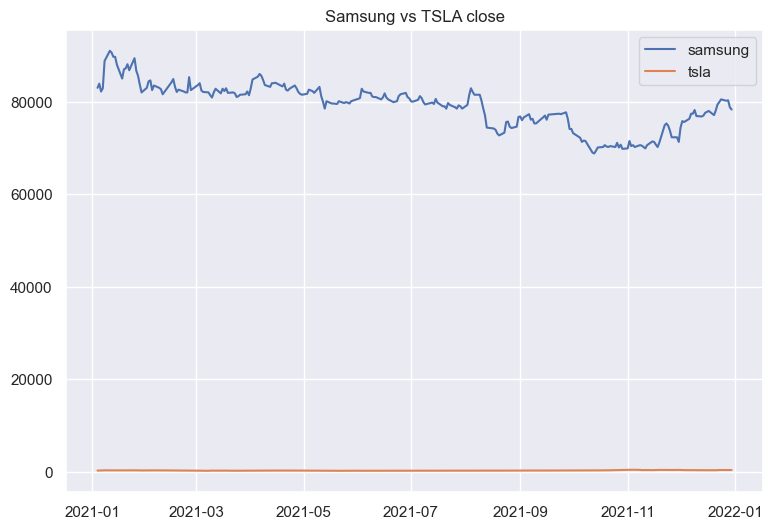

In [32]:
plt.figure(figsize=(9, 6))
plt.title('Samsung vs TSLA close')
plt.plot(df_ss.index, df_ss['Close'], label='samsung') # 원화 
plt.plot(df_ts.index, df_ts['Close'], label='tsla')   # 달러
plt.legend()
plt.show()

## 일간변동률(Daily Percent Change) 
* <font color=red size=4><b>가격이 다른 두 주가의 수익률 비교
* <font color=red>오늘 - 기준일 / 기준일 * 100
* ref : https://www.investopedia.com/terms/p/percentage-change.asp

<pre>
* increase   = New Number - Original Number
* increase%  = Increase ÷ Original Number × 100.
* decrease   = Original Number - New Number
* decrease%  = Decrease ÷ Original Number × 100

  

### df["Close"].pct_change() 

In [12]:
df_ss["pct_chg2"] = df_ss["Close"].pct_change() 
df_ts["pct_chg2"] = df_ts["Close"].pct_change() 
df_ss.head(3)

,Open,High,Low,Close,Adj Close,Volume,pct_chg2
Date,,,,,,,
2021-01-04,81000.0,84400.0,80200.0,83000.0,79551.835938,38655276,NaN
2021-01-05,81600.0,83900.0,81600.0,83900.0,80414.437500,35335669,0.010843
2021-01-06,83300.0,84500.0,82100.0,82200.0,78785.070312,42089013,-0.020262


### 결측 채우기

In [13]:
df_ss.fillna(method='bfill', inplace=True)  # bfill : 뒤의 값으로 앞을 채움
df_ts.fillna(method='bfill', inplace=True)
df_ss.head()

,Open,High,Low,Close,Adj Close,Volume,pct_chg2
Date,,,,,,,
2021-01-04,81000.0,84400.0,80200.0,83000.0,79551.835938,38655276,0.010843
2021-01-05,81600.0,83900.0,81600.0,83900.0,80414.437500,35335669,0.010843
2021-01-06,83300.0,84500.0,82100.0,82200.0,78785.070312,42089013,-0.020262
2021-01-07,82800.0,84200.0,82700.0,82900.0,79455.976562,32644642,0.008516
2021-01-08,83300.0,90000.0,83000.0,88800.0,85110.875000,59013307,0.071170


### 차트

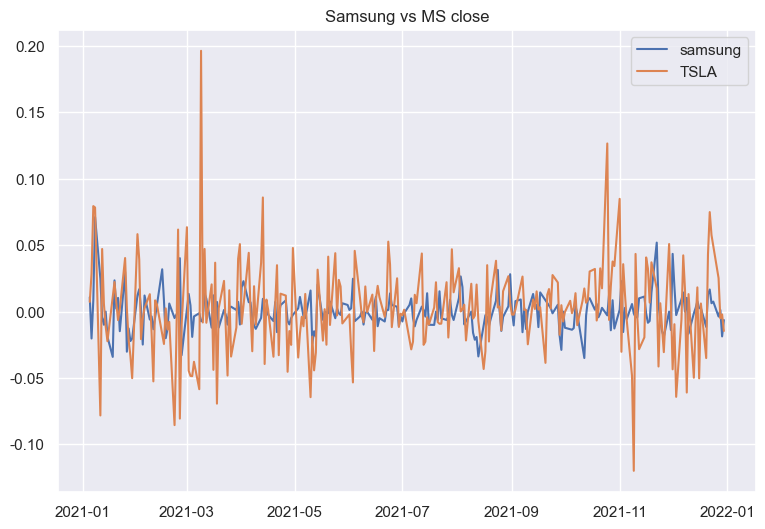

In [40]:
plt.figure(figsize=(9, 6))
# plt.subplot(2, 1, 1)
plt.title('Samsung vs MS close')
plt.plot(df_ss.index, df_ss['pct_chg2'], label='samsung')
plt.plot(df_ts.index, df_ts['pct_chg2'], label='TSLA')
plt.legend()
plt.show()

In [41]:
df_ts

,Open,High,Low,Close,Adj Close,Volume,pct_chg2
Date,,,,,,,
2021-01-04,239.820007,248.163330,239.063339,243.256668,243.256668,145914600,NaN
2021-01-05,241.220001,246.946671,239.733337,245.036667,245.036667,96735600,0.007317
2021-01-06,252.830002,258.000000,249.699997,251.993332,251.993332,134100000,0.028390
2021-01-07,259.209991,272.329987,258.399994,272.013336,272.013336,154496700,0.079447
2021-01-08,285.333344,294.829987,279.463318,293.339996,293.339996,225166500,0.078403
...,...,...,...,...,...,...,...
2021-12-23,335.600006,357.660004,332.519989,355.666656,355.666656,92713200,0.057619
2021-12-27,357.890015,372.333344,356.906677,364.646667,364.646667,71145900,0.025248
2021-12-28,369.829987,373.000000,359.473328,362.823334,362.823334,60324000,-0.005000


## 일간 변동률 누적곱 -1 : 누적 수익률
- <b>cumsum : 누적합  -> 금액 비교일때
- <b>cumprod : 누적곱  -> 수익률 비교일때

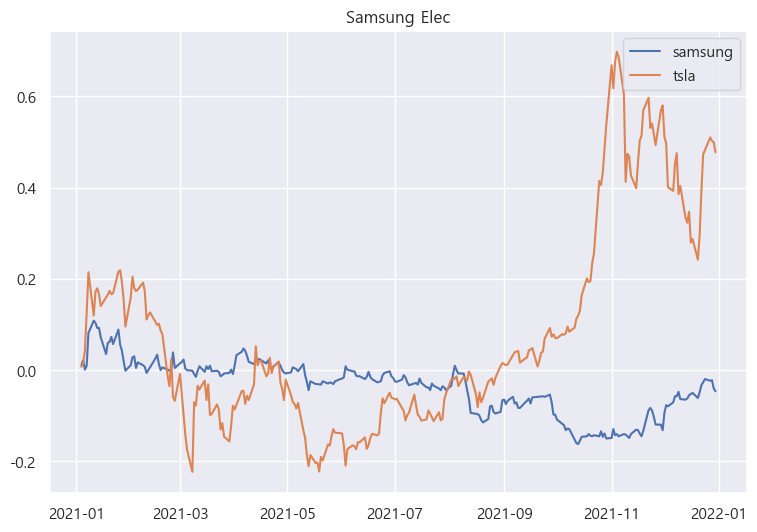

In [15]:
plt.figure(figsize=(9, 6))
plt.title('Samsung Elec')
plt.plot(df_ss.index  , (df_ss['pct_chg2']+1).cumprod()-1, label='samsung')  
plt.plot(df_ts.index  , (df_ts['pct_chg2']+1).cumprod()-1, label='tsla')
plt.legend()

# [실습] 최대낙폭, 최대손실폭(Maximum DrowDown) : MDD 
* 특정 기간에서 발생한 최고점에서 최저점까지의 가장 큰 손실 == 최대 얼마의 손실이 날 수 있는가?
* (65-130)/130=-50%

<table>
<tr>
<td><img src='https://downloads.intercomcdn.com/i/o/79244225/7dad4f4f919e2be8a4a791e6/MDD.png?expires=1619851026&signature=aafb18bbd3ed5f6946ad53a5fb9f19d6dbc7316703c94667bc422babd38a2200'></td><br>
<td><img src='https://downloads.intercomcdn.com/i/o/79243103/d9a69bea18818ef2f126a6f8/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA+2018-10-04+15.48.43.png?expires=1619851026&signature=dcce134c2a4882b00790a53d5d8cba27350f8f48f8c59d681be007e99def032c'></td>
</tr>
</table>

## Data Load 

In [45]:
import FinanceDataReader as fdr
ohlcv_df   = fdr.DataReader('005930', '2021')  # 삼성전자(005930) , 2017-01-01 ~ Now
ohlcv_df.columns = [ str.lower() for str in ohlcv_df.columns]
print(ohlcv_df.shape)
ohlcv_df.head()

(574, 6)


,open,high,low,close,volume,change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262
2021-01-07,82800,84200,82700,82900,32644642,0.008516
2021-01-08,83300,90000,83000,88800,59013307,0.071170


## 1년 기준 최고가 

In [44]:
ohlcv_df['peak'] = ohlcv_df['close'].rolling(window=252, min_periods=1).max()
ohlcv_df.head()

NameError: name 'ohlcv_df' is not defined

## 최고가 대비 종가 비율

In [44]:
# 최고치 대비 현재 종가가 얼마나 하락했는가?
ohlcv_df['close_pick_rate'] =  (ohlcv_df['close'] - ohlcv_df['peak']) / ohlcv_df['peak']
ohlcv_df.head()

,open,high,low,close,volume,change,peak,close_pick_rate
Date,,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691,83000.0,0.000000
2021-01-05,81600,83900,81600,83900,35335669,0.010843,83900.0,0.000000
2021-01-06,83300,84500,82100,82200,42089013,-0.020262,83900.0,-0.020262
2021-01-07,82800,84200,82700,82900,32644642,0.008516,83900.0,-0.011919
2021-01-08,83300,90000,83000,88800,59013307,0.071170,88800.0,0.000000


## MDD

In [43]:
mdd = ohlcv_df.rolling(window=252, min_periods=1)['close_pick_rate'].min() 
mdd.min()

NameError: name 'ohlcv_df' is not defined

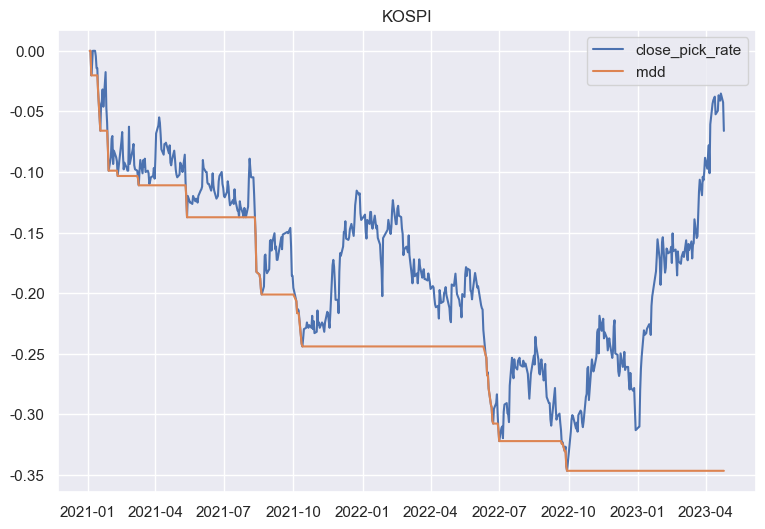

In [46]:
plt.figure(figsize=(9, 6))
plt.title('KOSPI')
plt.plot(ohlcv_df['close_pick_rate'], label='close_pick_rate')
plt.plot(mdd, label='mdd')
plt.legend()

### 공통함수 생성

* 차트 그리기

In [47]:
# def myplot(df, nrows=5,  kind='line', title='제목', labels=False):  
#     if nrows > 0:
#         print(df.head(nrows))
#     else:
#         print(df.tail(nrows))
    
#     if labels:
#         cols = df.columns
#         for i, col in enumerate(cols):
#             df[col].plot(label=labels[i], kind=kind)
#     else :
#         df.plot(kind=kind)
    
#     plt.title(title)
#     plt.legend()
#     plt.show()

In [48]:
# def myplotmix(df1, df2, y1='ylabel-1', y2='ylabel-2', kind1='bar', kind2='line', title='제목',  nrows1=5, nrows2=5,  labels=False):  
#     ytl=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

#     if nrows1 > 0:
#         print(df1.head(nrows1))
#     elif nrows1 < 0:
#         print(df1.tail(nrows1))
#     if nrows2 > 0:
#         print(df2.head(nrows2))
#     else:
#         print(df2.tail(nrows2))
#     fig, ax1 = plt.subplots(figsize=(12, 4))
#     ax2=ax1.twinx()
#     if kind1 == 'line':
#         df1.plot(kind=kind1, ax=ax2, marker='d',color='#e35f62')  #color='y', 
#         df2.plot(kind=kind2, ax=ax1)  #bar
#     else:
#         df1.plot(kind=kind1, ax=ax1,color='#bcbd22')
#         df2.plot(kind=kind2, ax=ax2) #color='y',
        
#     # df['date'] = df['date'].dt.strftime('%Y-%m-%d')
#     # ax1.set_xticklabels(df['date'])    
#     ax1.yaxis.tick_right()
#     ax2.yaxis.tick_left()
#     ax1.set_ylabel(y1) #, color='red')
#     ax2.set_ylabel(y2) #, color='red')
#     ax1.legend(loc=1)
#     ax2.legend(loc=2)
#     plt.title(title)
#     ax1.grid(False)
#     ax2.grid(False)
#     plt.show()

# 키움증권 수익률 계산 예시

* <b>투자원금평잔</b> = 평가 기간초 자산액계 + 기간내 총입출금고평잔
* <b>평가손익</b> = 기간말자산액 - 기간초자산액 + 출금 - 입금 + 총출고 - 총입고 + 매도 - 매수
* <b>수익률</b> = (평가손익/투자원금평잔) * 100

<img src='https://t1.daumcdn.net/cfile/tistory/99FF84455EB80BED05'>